<a href="https://colab.research.google.com/github/SURIYA-po/Data-Analysis/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is project on data science where i tried to find the feature that are correlated for house price prediction and Train on different model to predict the price of the House.Here Let's start the project ...

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("/content/drive/MyDrive/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Extracting some dataset info

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


ploting the bedrooms, area and bathrooms in histogram

<Axes: xlabel='bedrooms', ylabel='Count'>

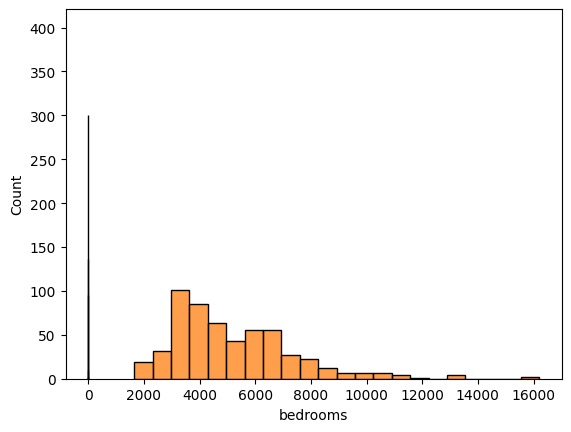

In [ ]:
sns.histplot(df['bedrooms'])

sns.histplot(df['bathrooms'])

<Axes: xlabel='area', ylabel='Count'>

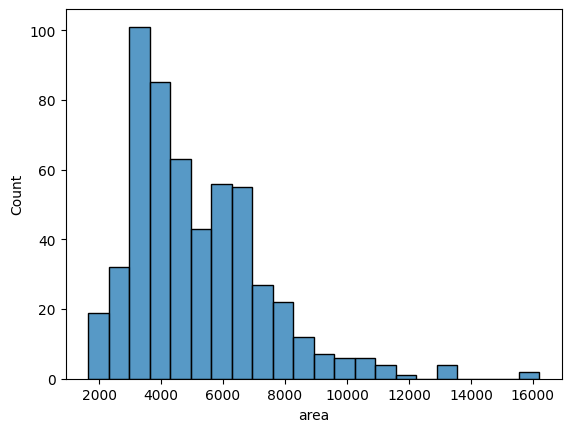

In [ ]:
sns.histplot(df['area'])

scatter plot of houseprice vs others

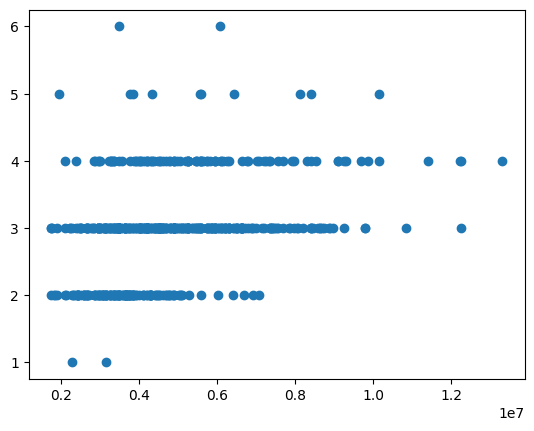

In [ ]:
plt.scatter(df['price'],df['bedrooms'])


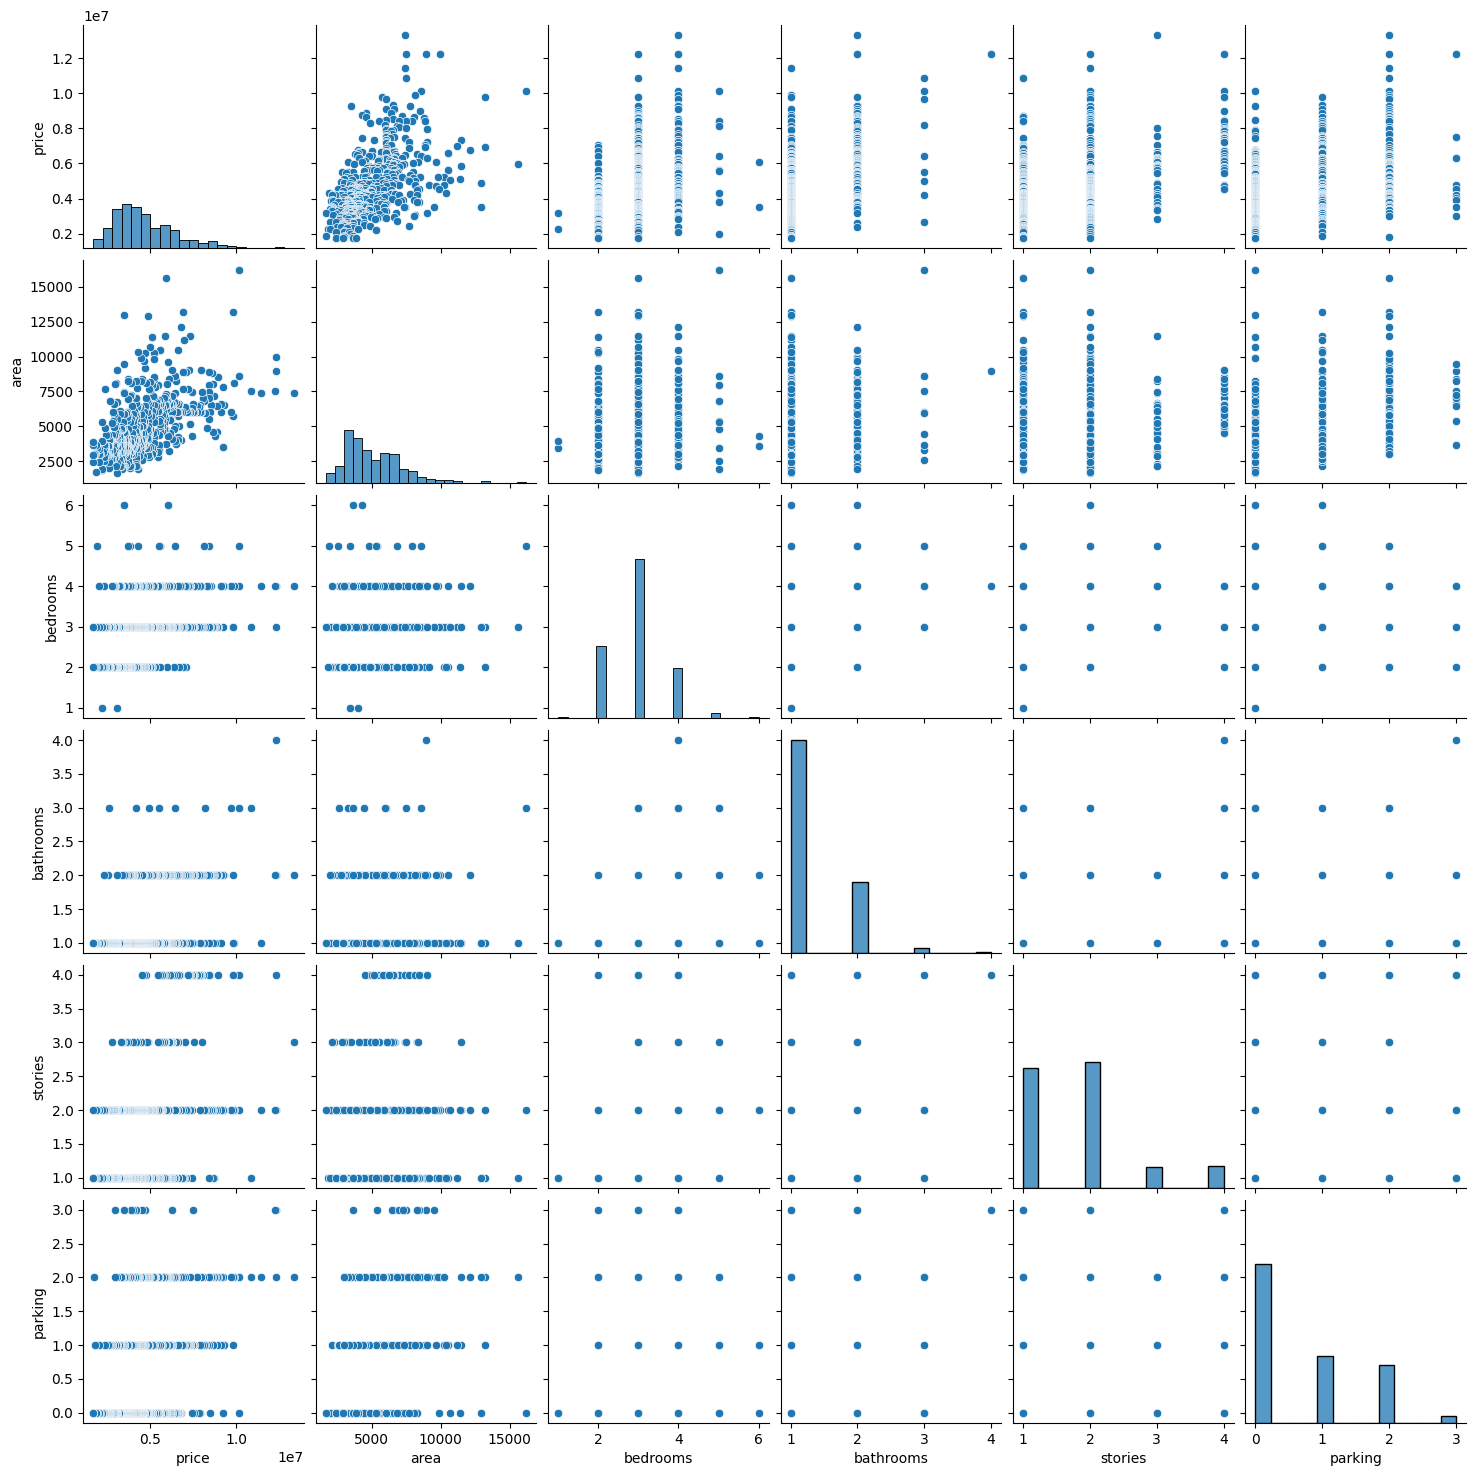

In [ ]:
sns.pairplot(df)
#

Visulazing the categorical values

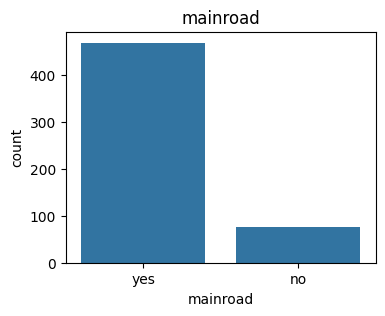

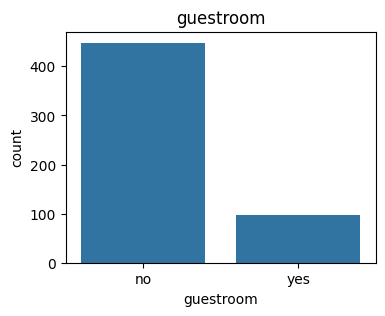

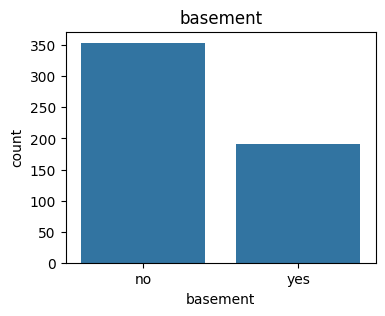

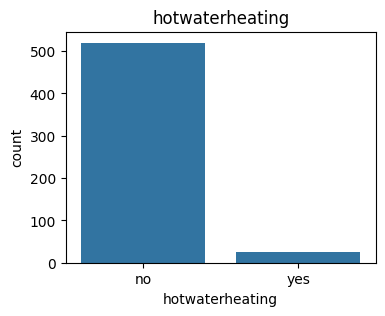

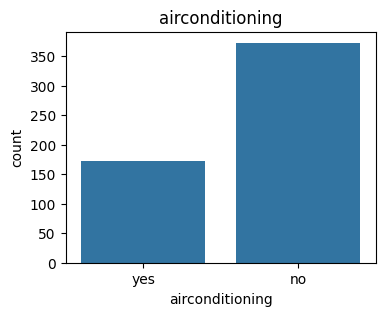

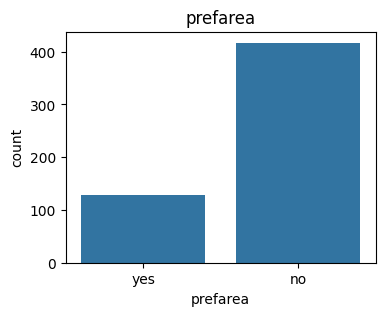

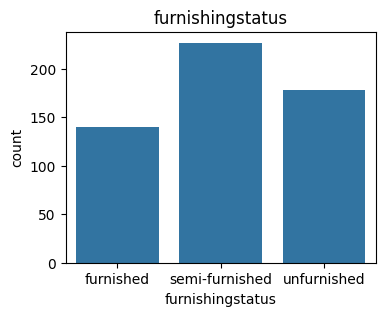

In [ ]:
categorical_cols = ['mainroad','guestroom','basement','hotwaterheating',
                    'airconditioning','prefarea','furnishingstatus']

for col in categorical_cols:
    plt.figure(figsize=(4,3))
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.show()

finding the imapct on price for each categorical value

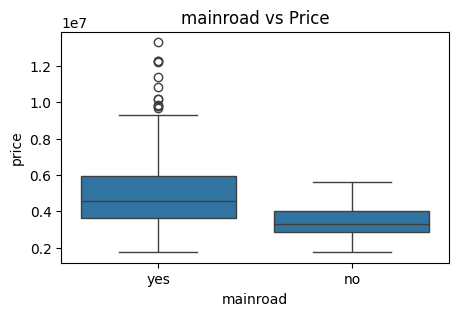

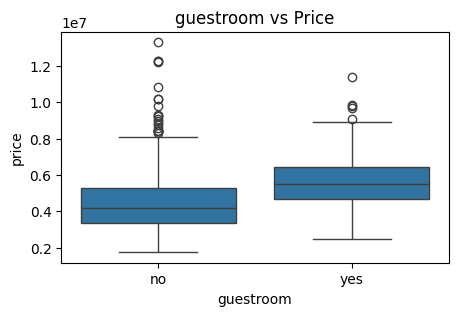

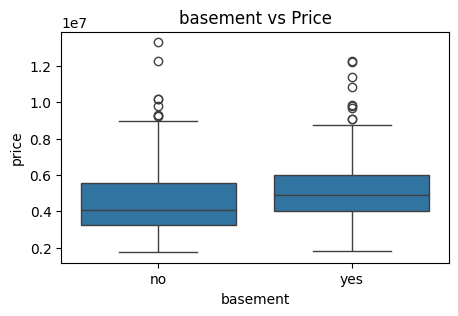

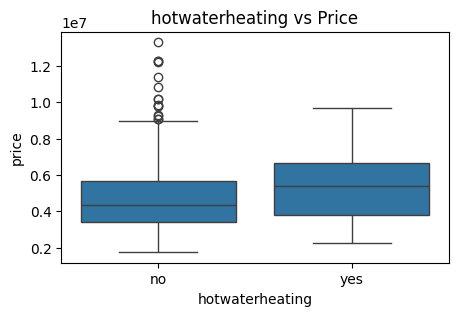

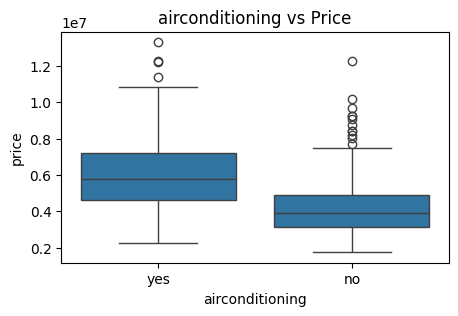

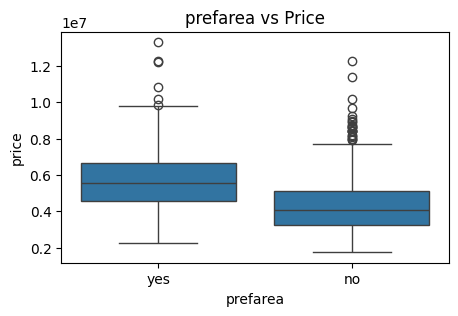

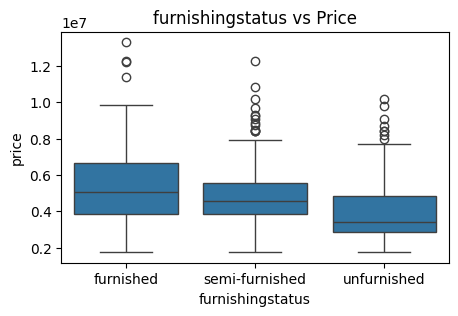

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f"{col} vs Price")
    plt.show()

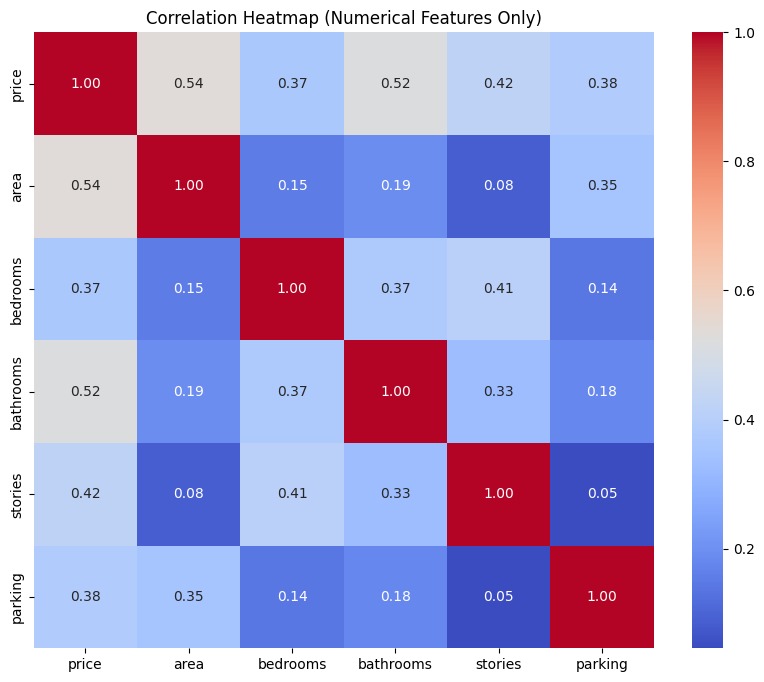

In [18]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 2. Create correlation matrix
corr_matrix = numeric_df.corr()

# 3. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

Encoding the categorical vlaue with one hot encoder

In [31]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['mainroad','guestroom','basement','hotwaterheating',
              'airconditioning','prefarea']

le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [32]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [33]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


Finding correlation betweeen features and price

# Task
The task is to train and evaluate Linear Regression, Decision Tree Regressor, and Random Forest Regressor models on the preprocessed housing dataset. This involves splitting the data into training and testing sets, training each model, evaluating their performance using R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE), comparing these metrics in a DataFrame, and visualizing the R-squared scores with a bar plot to identify the best-performing model.

## Prepare Data for Modeling

### Subtask:
Split the preprocessed DataFrame into features (X) and target (y). Then, split the data into training and testing sets to prepare for model training.


**Reasoning**:
First, I'll separate the target variable 'price' from the features into 'y' and 'X' respectively. Then, I'll import `train_test_split` and use it to divide the data into training and testing sets, which is a crucial step before model training.



In [19]:
X = df.drop('price', axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 12)
X_test shape: (109, 12)
y_train shape: (436,)
y_test shape: (109,)


**Reasoning**:
The next logical step is to train a Linear Regression model using the training data, make predictions on the test set, and then evaluate its performance using R-squared, MAE, and MSE. This aligns with the overall subtask of training and evaluating models.



In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_reg_model.predict(X_test)

# Evaluate the model
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

print(f"Linear Regression R-squared: {r2_linear:.4f}")
print(f"Linear Regression MAE: {mae_linear:.2f}")
print(f"Linear Regression MSE: {mse_linear:.2f}")

Linear Regression R-squared: 0.6529
Linear Regression MAE: 970043.40
Linear Regression MSE: 1754318687330.66


The next step is to tain on Decison tree model .


In [22]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print(f"Decision Tree Regressor R-squared: {r2_dt:.4f}")
print(f"Decision Tree Regressor MAE: {mae_dt:.2f}")
print(f"Decision Tree Regressor MSE: {mse_dt:.2f}")

Decision Tree Regressor R-squared: 0.4771
Decision Tree Regressor MAE: 1195266.06
Decision Tree Regressor MSE: 2642802637614.68


**Reasoning**:
Following the evaluation of the Decision Tree Regressor, the next step is to train and evaluate the Random Forest Regressor model, as outlined in the main task. This involves importing the `RandomForestRegressor`, fitting it to the training data, predicting on the test set, and calculating its R-squared, MAE, and MSE scores.



In [23]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest Regressor R-squared: {r2_rf:.4f}")
print(f"Random Forest Regressor MAE: {mae_rf:.2f}")
print(f"Random Forest Regressor MSE: {mse_rf:.2f}")

Random Forest Regressor R-squared: 0.6114
Random Forest Regressor MAE: 1022560.05
Random Forest Regressor MSE: 1964193399645.33


**Reasoning**:
Now that all three models (Linear Regression, Decision Tree Regressor, and Random Forest Regressor) have been trained and their evaluation metrics (R-squared, MAE, MSE) calculated, the next step is to consolidate these metrics into a single Pandas DataFrame. This will facilitate a clear comparison of their performance, which is explicitly requested in the overall task description.



In [24]:
import pandas as pd

# Create a dictionary to store the metrics
metrics_data = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor'],
    'R-squared': [r2_linear, r2_dt, r2_rf],
    'MAE': [mae_linear, mae_dt, mae_rf],
    'MSE': [mse_linear, mse_dt, mse_rf]
}

# Create a DataFrame from the metrics data
metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame
print("\nModel Performance Comparison:")
print(metrics_df.round(2))


Model Performance Comparison:
                     Model  R-squared         MAE           MSE
0        Linear Regression       0.65   970043.40  1.754319e+12
1  Decision Tree Regressor       0.48  1195266.06  2.642803e+12
2  Random Forest Regressor       0.61  1022560.05  1.964193e+12


**Reasoning**:
Now that the model performance metrics are consolidated in a DataFrame, the next step is to visualize the R-squared scores using a bar plot to visually compare the performance of each model and identify the best one, as specified in the subtask instructions.



/tmp/ipython-input-3214758555.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R-squared', data=metrics_df, palette='viridis')


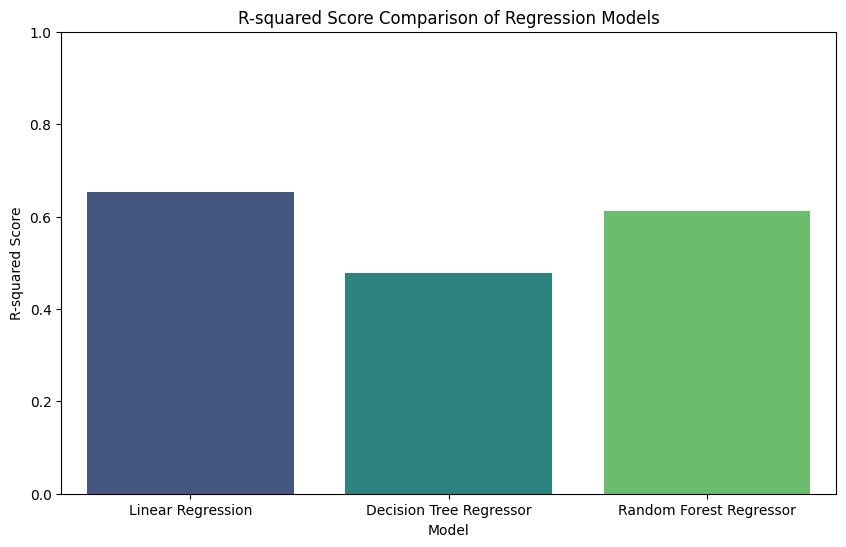

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for R-squared scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=metrics_df, palette='viridis')
plt.title('R-squared Score Comparison of Regression Models')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.ylim(0, 1) # R-squared typically ranges from 0 to 1
plt.show()


**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without `hue` in `sns.barplot`. To address this warning and ensure future compatibility, I will explicitly set `hue='Model'` and `legend=False` in the `barplot` function call, as suggested by the warning.



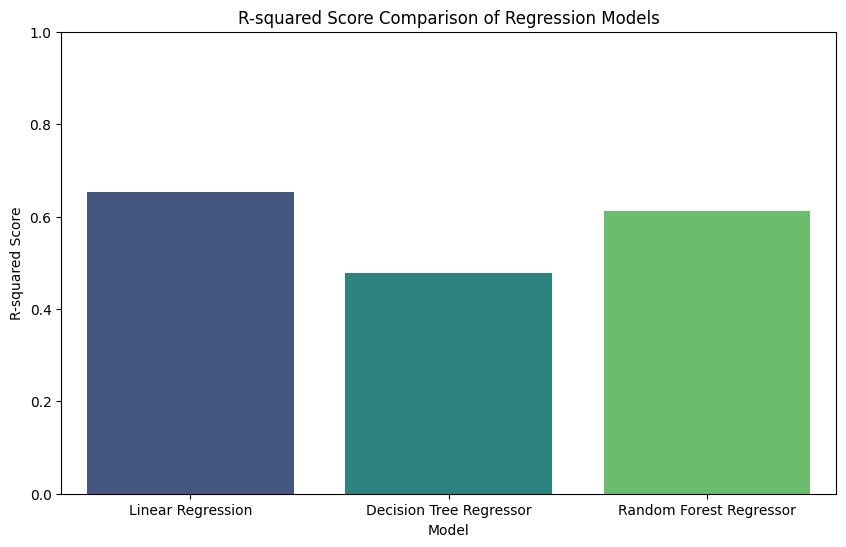

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for R-squared scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=metrics_df, palette='viridis', hue='Model', legend=False)
plt.title('R-squared Score Comparison of Regression Models')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.ylim(0, 1) # R-squared typically ranges from 0 to 1
plt.show()

## Final Task

### Subtask:
Summarize the performance of the models and identify the best-performing one based on the evaluation metrics.


## Summary:

### Q&A
The best-performing model based on the evaluation metrics is Linear Regression.

### Data Analysis Key Findings
*   An initial attempt to train the Linear Regression model failed due to unaddressed non-numeric categorical values, highlighting the importance of applying all preprocessing steps *before* the data split for training. This issue was subsequently corrected by properly encoding categorical features (Label Encoding for binary, One-Hot Encoding for multi-class) before splitting the data.
*   After correction, Linear Regression achieved an R-squared of 0.65, a Mean Absolute Error (MAE) of \$970,043.40, and a Mean Squared Error (MSE) of \$1.75 trillion.
*   The Random Forest Regressor model followed with an R-squared of 0.61, an MAE of \$1,022,560.05, and an MSE of \$1.96 trillion.
*   The Decision Tree Regressor performed the least effectively among the three, yielding an R-squared of 0.48, an MAE of \$1,195,266.06, and an MSE of \$2.64 trillion.
*   Linear Regression demonstrated the highest R-squared score, indicating it explained the most variance in the target variable, making it the best-performing model in this comparison.

